In [1]:
import torch
import torch.nn as nn
import torch.utils.data
from torchvision import datasets, transforms
import torch.nn.functional as F
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from functools import reduce
import operator

def prod(iterable):
    return reduce(operator.mul, iterable, 1)

def make_sun():
    size = 28
    xx, yy = np.meshgrid(np.arange(size)-(size-1)/2.,np.arange(size)-(size-1)/2)
    r = np.sqrt(xx*xx+yy*yy) 
    rad = np.random.rand(1)*(size/3)
    image = np.exp(-(r*r)/(rad*rad))*rad
    return image

In [2]:
class NetCNN(nn.Module):
    def __init__(self, input_shape):
        super().__init__()
        if (len(input_shape) != 3):
            raise ValueError('Expecting an input_shape representing dimensions CxHxW')
        self._input_channels = input_shape[0]
        print('input_channels: {}'.format(self._input_channels))
        self._conv2d1 = nn.Conv2d(in_channels=self._input_channels, out_channels=64, kernel_size=3)
        self._conv2d2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3)
        self._cnn_output_dim = self._cnn(torch.zeros(input_shape).unsqueeze(1)).nelement()
        print('cnn_output_dim: {}'.format(self._cnn_output_dim))
        self._fc1 = nn.Linear(self._cnn_output_dim, 256)
        self._fc2 = nn.Linear(256, 1)
        
    def _cnn(self, x):
        x = self._conv2d1(x)
        x = torch.relu(x)
        x = nn.MaxPool2d(kernel_size=3)(x)
        x = self._conv2d2(x)
        x = nn.MaxPool2d(kernel_size=3)(x)
        return x
    
    
    def forward(self, x):
        batch_dim = x.shape[0]
        x = self._cnn(x).view(batch_dim, -1)
        x = self._fc1(x)
        x = torch.relu(x)
        x = self._fc2(x)
        x = torch.sigmoid(x)
        return x
    
class NetFF(nn.Module):
    def __init__(self, input_shape):
        super().__init__()
        if (len(input_shape) != 3):
            raise ValueError('Expecting an input_shape representing dimensions CxHxW')
        self._input_channels = input_shape[0]
        print('input_channels: {}'.format(self._input_channels))
        self._input_dim = prod(input_shape)
        print('input_dim: {}'.format(self._input_dim))
        self._fc1 = nn.Linear(self._input_dim, 64)
        self._fc2 = nn.Linear(64, 1)
        
    def forward(self, x):
        x = x.view(-1, self._input_dim)
        x = self._fc1(x)
        x = torch.relu(x)
        x = self._fc2(x)
        x = 2 * (torch.sigmoid(x) - 0.5)
        return x

In [3]:
batch_size = 16
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ])),
    batch_size=batch_size, shuffle=True)

input_channels: 1
cnn_output_dim: 512

Train Epoch: 0 [0/60000 (0%)]	Loss: 0.099488
dim_factors ground truth: [0.68831086 0.4310977  0.929636   0.78189564 0.39498955 0.06806552
 0.01890594 0.8172847  0.9216625  0.2024939  0.558399   0.18052262
 0.0398978  0.12228018 0.5265573  0.54103994]
dim_factors predicted   : [0.4844415  0.4955222  0.49652153 0.48636445 0.49877533 0.50379646
 0.502871   0.5026856  0.49605608 0.4983378  0.49129394 0.5000846
 0.50233835 0.50015295 0.48119855 0.48311055]


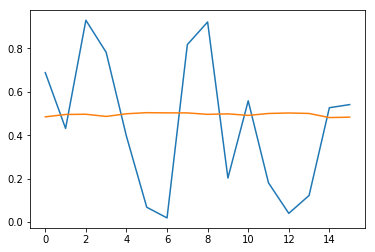


Train Epoch: 0 [16/60000 (0%)]	Loss: 0.101391
dim_factors ground truth: [0.97084254 0.39389706 0.94509554 0.5840259  0.98174316 0.180067
 0.81596804 0.19409633 0.19439757 0.5809137  0.03213096 0.69610757
 0.9522743  0.3857665  0.26197642 0.07423329]
dim_factors predicted   : [0.6366813  0.56771046 0.48965964 0.4802704  0.65205926 0.5783232
 0.5800922  0.5648927  0.5548674  0.49009544 0.48754877 0.7346595
 0.6962782  0.6825616  0.6189818  0.49089947]


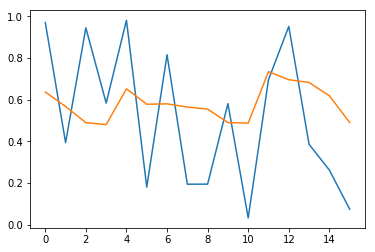


Train Epoch: 0 [32/60000 (0%)]	Loss: 0.066239
dim_factors ground truth: [0.13026983 0.61998093 0.6674088  0.9262288  0.29799342 0.796846
 0.08456904 0.9447401  0.848652   0.069682   0.2527427  0.48053414
 0.84314257 0.87799394 0.19980699 0.01969653]
dim_factors predicted   : [0.47620153 0.570576   0.6660065  0.79771364 0.554783   0.76494765
 0.4702994  0.79277337 0.7224166  0.46966392 0.5361426  0.4973531
 0.5133315  0.7200371  0.5160326  0.4580098 ]


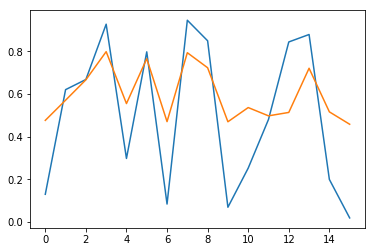


Train Epoch: 0 [48/60000 (0%)]	Loss: 0.026116
dim_factors ground truth: [0.98259705 0.7823054  0.09701991 0.12221658 0.4066351  0.6858509
 0.62718153 0.675848   0.5166226  0.63957614 0.6420984  0.5306545
 0.72629905 0.25587893 0.7554286  0.6075278 ]
dim_factors predicted   : [0.8487798  0.8141943  0.4332166  0.42079598 0.66053694 0.6953496
 0.6078609  0.77826655 0.6680755  0.76340884 0.5360146  0.71119946
 0.6334407  0.4207968  0.7855833  0.5577379 ]


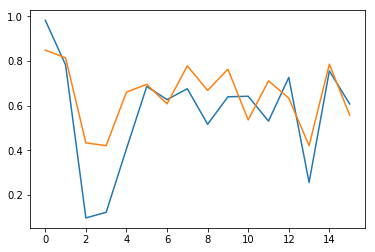


Train Epoch: 0 [64/60000 (0%)]	Loss: 0.044190
dim_factors ground truth: [0.48928005 0.72341406 0.4449265  0.12717539 0.83443683 0.06621289
 0.8734378  0.36975104 0.5711399  0.546318   0.75959426 0.42982292
 0.6754691  0.49659997 0.6338173  0.24806112]
dim_factors predicted   : [0.46037385 0.5936717  0.3736774  0.390764   0.37369245 0.37466604
 0.6370048  0.42500305 0.49253675 0.48099563 0.43481818 0.44609416
 0.3736774  0.4532032  0.5694349  0.43550888]


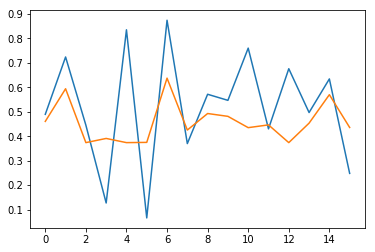


Train Epoch: 0 [80/60000 (0%)]	Loss: 0.065790
dim_factors ground truth: [0.20443052 0.01780796 0.2631262  0.38547468 0.695742   0.73486406
 0.01707828 0.28954995 0.21516687 0.06755686 0.85827243 0.9445565
 0.14854008 0.6319498  0.11721039 0.62241393]
dim_factors predicted   : [0.3688487  0.35842422 0.3666887  0.37306556 0.4337817  0.45492837
 0.35853225 0.36174962 0.40820548 0.35865194 0.55422014 0.4389068
 0.36268607 0.43960503 0.36642364 0.500622  ]


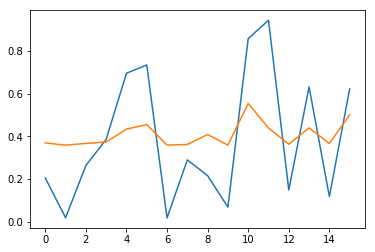


Train Epoch: 0 [96/60000 (0%)]	Loss: 0.026036
dim_factors ground truth: [0.86643535 0.4112845  0.330198   0.20018327 0.57279015 0.8816893
 0.42133498 0.17252934 0.6154028  0.7505224  0.44778186 0.17272925
 0.6284571  0.59368974 0.26231092 0.65949035]
dim_factors predicted   : [0.7628797  0.51935446 0.41735256 0.35793236 0.6509867  0.6474106
 0.56112516 0.34602758 0.35268646 0.73594683 0.5710601  0.34707788
 0.6804575  0.6406304  0.46868056 0.3616111 ]


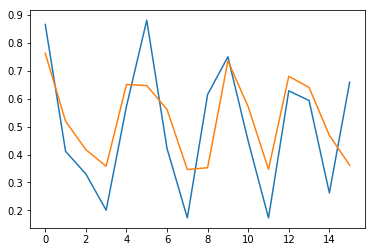


Train Epoch: 0 [112/60000 (0%)]	Loss: 0.038962
dim_factors ground truth: [0.6772306  0.8525377  0.8893011  0.42193115 0.18884033 0.3030607
 0.22651249 0.40250456 0.48265928 0.6998059  0.71866333 0.97491664
 0.557031   0.88134193 0.9944993  0.4771272 ]
dim_factors predicted   : [0.5830146  0.85580695 0.8643754  0.6335045  0.4267271  0.35154942
 0.46327427 0.6247121  0.61114097 0.7899005  0.80205756 0.44122788
 0.40262368 0.86977243 0.7704742  0.35801643]


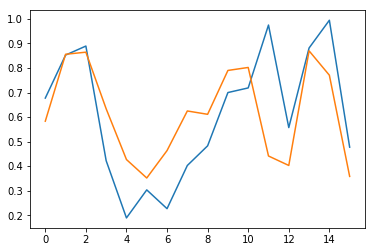


Train Epoch: 0 [128/60000 (0%)]	Loss: 0.062959
dim_factors ground truth: [0.9516185  0.40744263 0.50268745 0.76468337 0.5973711  0.08775443
 0.8733383  0.35278982 0.38982177 0.39645153 0.32025915 0.87257737
 0.31868047 0.9076382  0.14282417 0.5253292 ]
dim_factors predicted   : [0.87551016 0.5811039  0.64074826 0.31826255 0.65547884 0.31859908
 0.31812143 0.36168724 0.5713785  0.5355558  0.39262718 0.37009516
 0.5170297  0.8699942  0.32513005 0.46208996]


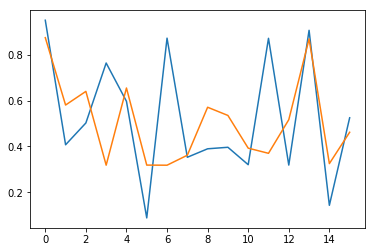


Train Epoch: 0 [144/60000 (0%)]	Loss: 0.049362
dim_factors ground truth: [0.4183253  0.9385471  0.75342965 0.02155775 0.32003248 0.5108739
 0.7845147  0.1794926  0.8674203  0.88731253 0.1039747  0.45229107
 0.13852954 0.6863639  0.56527185 0.13198352]
dim_factors predicted   : [0.36758065 0.31992424 0.5445167  0.30787894 0.4122867  0.44812596
 0.54533863 0.32936946 0.7077242  0.75248724 0.31669414 0.5030519
 0.32378814 0.52497905 0.5441566  0.31763852]


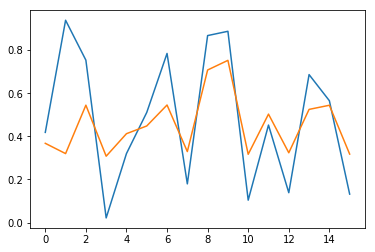


Train Epoch: 0 [160/60000 (0%)]	Loss: 0.021901
dim_factors ground truth: [0.4865504  0.3215596  0.40935785 0.01346058 0.2959931  0.14577925
 0.13734055 0.3559463  0.16449457 0.5540818  0.63637954 0.45571882
 0.5875979  0.41091222 0.09848601 0.58364815]
dim_factors predicted   : [0.3682335  0.46414965 0.5444453  0.31890392 0.3818313  0.3222496
 0.34753385 0.46799782 0.32637286 0.617523   0.59897494 0.3174307
 0.5126602  0.44718394 0.32536295 0.59522694]


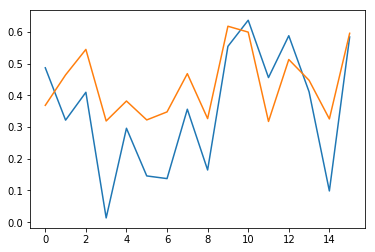


Train Epoch: 0 [176/60000 (0%)]	Loss: 0.027682
dim_factors ground truth: [0.2531125  0.8625158  0.36115438 0.9719489  0.92095363 0.7219418
 0.66539073 0.22994947 0.19385695 0.06773961 0.78907853 0.89826864
 0.21979767 0.24871713 0.23136473 0.03022271]
dim_factors predicted   : [0.42127073 0.53646755 0.48937416 0.799323   0.86841714 0.7410049
 0.6583739  0.37414205 0.37589008 0.30629373 0.811684   0.79978657
 0.31473097 0.41244832 0.3890763  0.30802435]


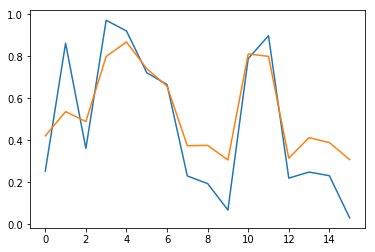


Train Epoch: 0 [192/60000 (0%)]	Loss: 0.035474
dim_factors ground truth: [0.70087385 0.958385   0.32792062 0.00480026 0.6411703  0.37194818
 0.13312656 0.01799309 0.41932732 0.9150801  0.48953182 0.3129595
 0.6107329  0.23766297 0.92305577 0.26494116]
dim_factors predicted   : [0.5957832  0.8618981  0.31298634 0.27827984 0.6482807  0.2780079
 0.30280674 0.27808857 0.52233714 0.66225654 0.51871836 0.38908058
 0.66747457 0.36994657 0.41478655 0.34657353]


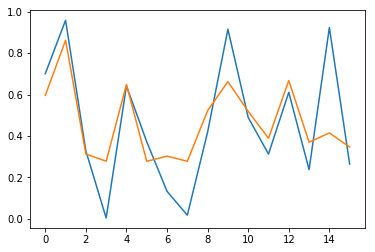


Train Epoch: 0 [208/60000 (0%)]	Loss: 0.053020
dim_factors ground truth: [0.93780583 0.49913895 0.6307134  0.02709764 0.642502   0.54182315
 0.49627113 0.21540022 0.693136   0.7471585  0.871209   0.04851687
 0.6864472  0.11792821 0.91615707 0.32874376]
dim_factors predicted   : [0.60411936 0.30226773 0.75342906 0.25947076 0.76742077 0.5295591
 0.63301784 0.29188833 0.32712087 0.3167227  0.79864305 0.24787027
 0.25898543 0.28170842 0.9086891  0.4512374 ]


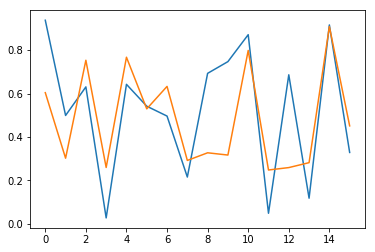


Train Epoch: 0 [224/60000 (0%)]	Loss: 0.058378
dim_factors ground truth: [0.1325512  0.8978757  0.37600255 0.11159611 0.33783275 0.21873027
 0.2876451  0.9129578  0.82335895 0.98155916 0.4066354  0.07701719
 0.91091514 0.18174618 0.3203867  0.9309158 ]
dim_factors predicted   : [0.2545695  0.92265797 0.31233498 0.27787644 0.370231   0.25680244
 0.3997221  0.5820162  0.46324745 0.7075402  0.27598897 0.26676586
 0.9078239  0.30263048 0.50027585 0.2545695 ]


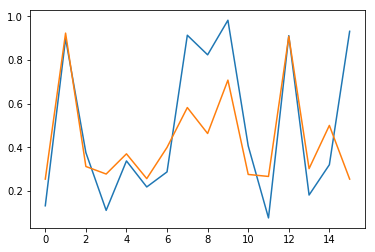


Train Epoch: 0 [240/60000 (0%)]	Loss: 0.043973
dim_factors ground truth: [0.6766476  0.9916977  0.6281337  0.51639175 0.29500228 0.2767318
 0.21054631 0.22411406 0.38738543 0.15765482 0.64050806 0.22770238
 0.7327424  0.6108549  0.00837898 0.10929793]
dim_factors predicted   : [0.88345087 0.8389195  0.88557357 0.26544046 0.53648466 0.51029253
 0.40757653 0.4224676  0.50661916 0.34787437 0.87893945 0.26544023
 0.93215054 0.87565374 0.2670908  0.28731188]


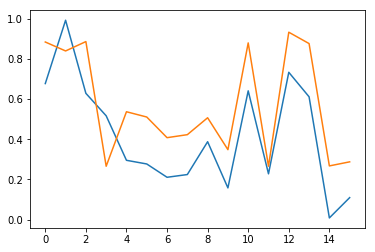


Train Epoch: 0 [256/60000 (0%)]	Loss: 0.066709
dim_factors ground truth: [0.45062    0.94119173 0.9865928  0.8601613  0.15740108 0.61517704
 0.64969873 0.951428   0.60593057 0.3311478  0.9027273  0.92092055
 0.04025018 0.54271805 0.766268   0.41626507]
dim_factors predicted   : [0.5975264  0.9366432  0.2468197  0.8715935  0.27875817 0.5326382
 0.5202825  0.63224787 0.71283174 0.42758605 0.4170746  0.93284494
 0.24941225 0.7030988  0.87041646 0.5616676 ]


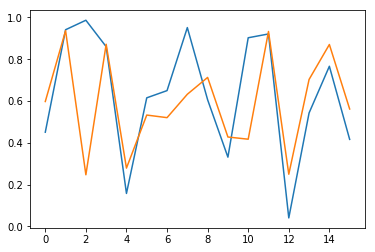


Train Epoch: 0 [272/60000 (0%)]	Loss: 0.033549
dim_factors ground truth: [0.39420086 0.94915897 0.45384377 0.5975872  0.13059878 0.84295446
 0.9033318  0.15208632 0.3560995  0.34511167 0.10324878 0.05191737
 0.24220252 0.24253696 0.08641237 0.25695252]
dim_factors predicted   : [0.42702505 0.47371373 0.49777538 0.39370653 0.25999036 0.6409538
 0.5679828  0.24662784 0.4069829  0.34284297 0.25101772 0.23479912
 0.28445747 0.3187658  0.23375952 0.2506329 ]


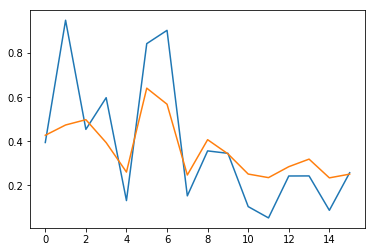


Train Epoch: 0 [288/60000 (0%)]	Loss: 0.014231
dim_factors ground truth: [0.7583182  0.2581473  0.49829    0.0156315  0.6609994  0.34435916
 0.894811   0.16451842 0.9876834  0.34470648 0.6227886  0.7460664
 0.734385   0.2530867  0.04885006 0.7965722 ]
dim_factors predicted   : [0.78711146 0.35025668 0.5920701  0.24863574 0.49789155 0.4213702
 0.9121952  0.2995308  0.9455848  0.41022712 0.7534704  0.8515411
 0.8340536  0.36046094 0.25594273 0.87153655]


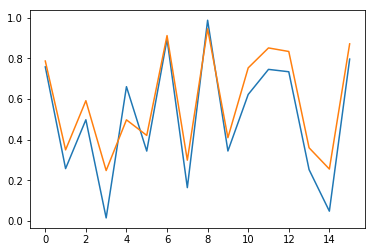


Train Epoch: 0 [304/60000 (1%)]	Loss: 0.017180
dim_factors ground truth: [0.7955817  0.28410745 0.0231688  0.7400454  0.17745143 0.94248015
 0.23993343 0.7475774  0.7885256  0.02564567 0.5701537  0.901039
 0.04428852 0.42832792 0.90729046 0.11242306]
dim_factors predicted   : [0.7884531  0.41214484 0.24326763 0.88216525 0.30829808 0.95194304
 0.3555482  0.8811746  0.8384444  0.24544992 0.6897162  0.93767434
 0.2502961  0.30555665 0.934343   0.2415758 ]


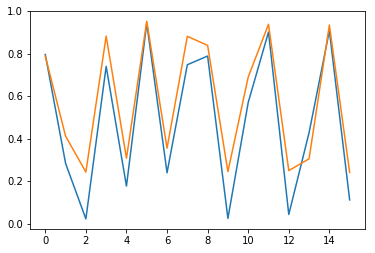


Train Epoch: 0 [320/60000 (1%)]	Loss: 0.034852
dim_factors ground truth: [0.08952767 0.74800646 0.33868438 0.88408256 0.6059432  0.8976503
 0.9856116  0.09043783 0.74725354 0.65694994 0.6054407  0.12461919
 0.6700148  0.79748374 0.10944957 0.39561027]
dim_factors predicted   : [0.24541546 0.22587009 0.46706775 0.7477252  0.79247624 0.9248776
 0.7890601  0.24440885 0.88034207 0.8245353  0.693243   0.25046626
 0.77662605 0.87540203 0.24549088 0.54549974]


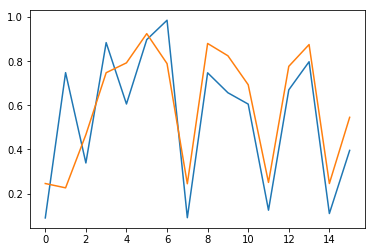


Train Epoch: 0 [336/60000 (1%)]	Loss: 0.007005
dim_factors ground truth: [0.7376904  0.33702654 0.04956806 0.78999794 0.2424308  0.09013271
 0.13327813 0.842206   0.55559355 0.5440754  0.10315239 0.67762405
 0.0979715  0.6023268  0.14555007 0.7110371 ]
dim_factors predicted   : [0.8323025  0.3850422  0.19186884 0.8135752  0.28554693 0.20442042
 0.21706674 0.8946153  0.50307    0.63363016 0.20393412 0.7617138
 0.21709068 0.54128563 0.22000612 0.7731956 ]


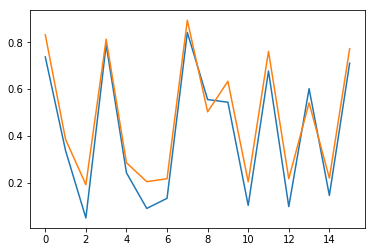


Train Epoch: 0 [352/60000 (1%)]	Loss: 0.029088
dim_factors ground truth: [0.05102634 0.89055127 0.48399448 0.07243913 0.5383148  0.92332894
 0.78939486 0.36901677 0.9869624  0.8119082  0.10812789 0.74819756
 0.8085846  0.6923445  0.82198596 0.21499425]
dim_factors predicted   : [0.16290765 0.43763036 0.42255217 0.18468393 0.17915572 0.77107865
 0.76626277 0.18907264 0.8796016  0.75378    0.1872692  0.6777296
 0.71982867 0.65348655 0.7182029  0.21389854]


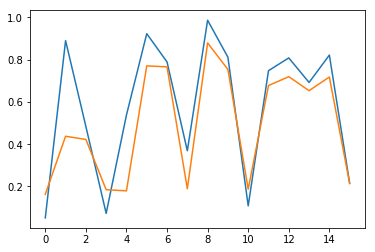


Train Epoch: 0 [368/60000 (1%)]	Loss: 0.072299
dim_factors ground truth: [0.41764295 0.33965564 0.17525703 0.88024944 0.69912636 0.9258057
 0.8181058  0.8100482  0.14360821 0.27502704 0.0780251  0.52283174
 0.27804047 0.33471894 0.5436662  0.12951487]
dim_factors predicted   : [0.20650263 0.193985   0.1651724  0.17300431 0.6982829  0.18737273
 0.6774444  0.7263346  0.17228903 0.23534143 0.17776664 0.5027722
 0.24104309 0.28596866 0.50641674 0.15645997]


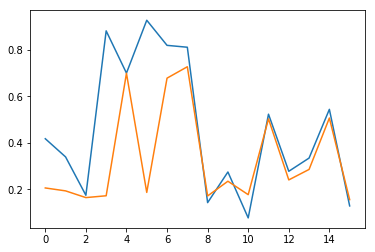


Train Epoch: 0 [384/60000 (1%)]	Loss: 0.029012
dim_factors ground truth: [0.09072781 0.27668613 0.87262416 0.03794318 0.12835342 0.15013868
 0.37669104 0.38895375 0.4487123  0.69168717 0.81878024 0.48443168
 0.77616465 0.14172912 0.4096009  0.7995067 ]
dim_factors predicted   : [0.1876985  0.2611877  0.85043055 0.17833285 0.19206655 0.18750697
 0.34951973 0.19530386 0.4214711  0.75425535 0.80729103 0.43904242
 0.7766443  0.19207726 0.41774714 0.18209006]


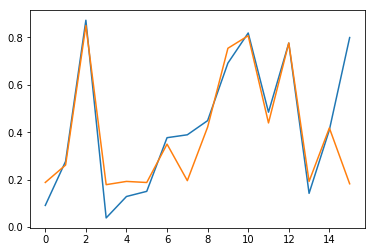


Train Epoch: 0 [400/60000 (1%)]	Loss: 0.037317
dim_factors ground truth: [0.91729987 0.47990865 0.81702626 0.62546813 0.03649378 0.2320565
 0.609655   0.7295663  0.13521487 0.03974628 0.98457825 0.861442
 0.00184667 0.8349522  0.27814245 0.63576597]
dim_factors predicted   : [0.9315739  0.5182161  0.8844191  0.74625    0.18898243 0.20526618
 0.7342445  0.84120905 0.205021   0.19559278 0.79192007 0.22154586
 0.19118673 0.8259345  0.29213998 0.7473395 ]


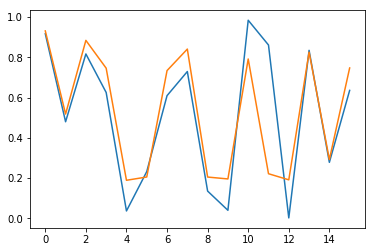


Train Epoch: 0 [416/60000 (1%)]	Loss: 0.005165
dim_factors ground truth: [0.5690562  0.37923878 0.28080475 0.9931861  0.6446402  0.2876237
 0.25980926 0.857303   0.88763    0.8449223  0.49538314 0.46485007
 0.15422958 0.13569504 0.06589109 0.19327313]
dim_factors predicted   : [0.6078685  0.2212532  0.30150995 0.92065716 0.74000734 0.30504397
 0.2773263  0.9068637  0.89355415 0.88281643 0.5767108  0.5170403
 0.20024194 0.20637897 0.20648678 0.2185889 ]


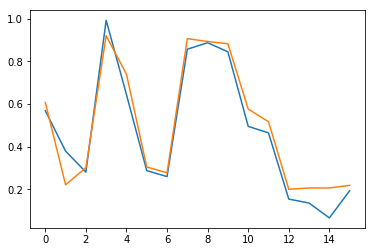


Train Epoch: 0 [432/60000 (1%)]	Loss: 0.006105
dim_factors ground truth: [0.67114145 0.9105429  0.07294863 0.8516065  0.7605297  0.6317145
 0.52564424 0.34550732 0.47796208 0.304362   0.3862551  0.08128399
 0.43451142 0.8814696  0.9029379  0.74056405]
dim_factors predicted   : [0.697974   0.9008767  0.20792443 0.87378085 0.80844015 0.68947804
 0.5353402  0.33444524 0.51156557 0.30171803 0.37452874 0.20909594
 0.20390564 0.88708436 0.89913946 0.702101  ]


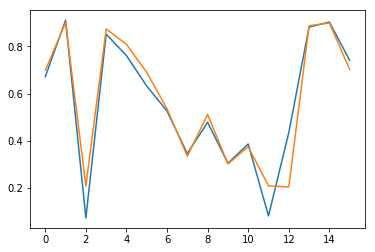


Train Epoch: 0 [448/60000 (1%)]	Loss: 0.016451
dim_factors ground truth: [0.9611549  0.6040641  0.95341575 0.44560313 0.43617612 0.69332033
 0.09484649 0.83910096 0.0190509  0.43435335 0.6380818  0.3749572
 0.70185375 0.71843046 0.00779969 0.16716415]
dim_factors predicted   : [0.8692857  0.60237753 0.87804294 0.40626946 0.20579876 0.37593335
 0.20676523 0.7985116  0.20732458 0.4249722  0.6385181  0.35486576
 0.68073446 0.71554595 0.20660575 0.2275206 ]


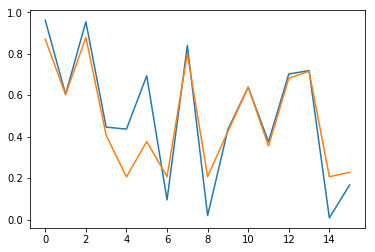


Train Epoch: 0 [464/60000 (1%)]	Loss: 0.023537
dim_factors ground truth: [0.6239668  0.7221514  0.6987587  0.02873337 0.4548502  0.8211265
 0.6168384  0.7695395  0.6246723  0.31957012 0.43817735 0.90791976
 0.07608098 0.05074668 0.68539184 0.26838446]
dim_factors predicted   : [0.5965622  0.6613658  0.21333829 0.21035674 0.43078    0.7426185
 0.6068401  0.6870235  0.6234049  0.32696992 0.4020006  0.80315226
 0.18110996 0.21264185 0.48540208 0.25107014]


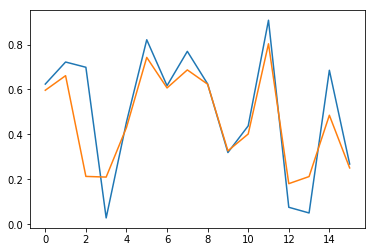


Train Epoch: 0 [480/60000 (1%)]	Loss: 0.033421
dim_factors ground truth: [0.9262317  0.36223322 0.13411283 0.57450783 0.9592903  0.30190194
 0.92838174 0.05108601 0.0236603  0.6985127  0.9998751  0.7484058
 0.19360888 0.8943847  0.05274975 0.07189012]
dim_factors predicted   : [0.31824508 0.35254505 0.21231152 0.536546   0.868647   0.3042654
 0.8575255  0.23197332 0.22667341 0.72717184 0.9037819  0.7116137
 0.24857473 0.79987127 0.2008273  0.22989401]


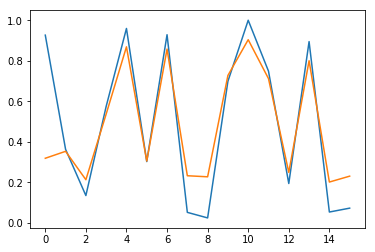


Train Epoch: 0 [496/60000 (1%)]	Loss: 0.059716
dim_factors ground truth: [0.03699613 0.49073988 0.9176452  0.25666726 0.25520164 0.47631985
 0.14613694 0.8655346  0.50340194 0.509838   0.23923975 0.32157677
 0.40176052 0.17694986 0.92298394 0.5804169 ]
dim_factors predicted   : [0.24055216 0.57607895 0.90363693 0.3539788  0.33659855 0.56341356
 0.27979    0.25962225 0.55646974 0.56923395 0.26957357 0.39476025
 0.4910182  0.2473017  0.2416537  0.67050225]


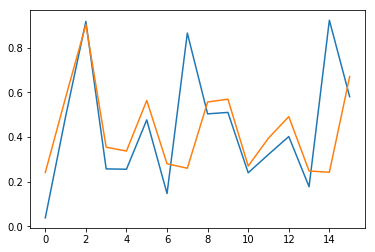


Train Epoch: 0 [512/60000 (1%)]	Loss: 0.015147
dim_factors ground truth: [0.23505574 0.27232844 0.30424303 0.12799019 0.46374607 0.4470983
 0.16073406 0.085769   0.28829086 0.161066   0.7078226  0.5429304
 0.48780757 0.98287034 0.32239127 0.8679634 ]
dim_factors predicted   : [0.29325223 0.39399892 0.39689058 0.26785004 0.53890026 0.572429
 0.2727811  0.27065918 0.351377   0.31715238 0.802844   0.2735842
 0.60751903 0.9414103  0.28990588 0.89789206]


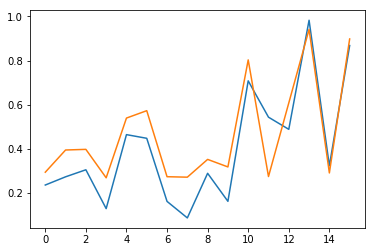


Train Epoch: 0 [528/60000 (1%)]	Loss: 0.037701
dim_factors ground truth: [0.6894889  0.55418515 0.268641   0.56890845 0.9770652  0.9788948
 0.94827896 0.99094117 0.9310786  0.82498854 0.27702177 0.0521692
 0.7305331  0.94748574 0.80526555 0.52374876]
dim_factors predicted   : [0.75929284 0.39681968 0.30638003 0.28164515 0.92968076 0.45609665
 0.9139343  0.9273069  0.9014862  0.86426145 0.39753467 0.23583733
 0.35471097 0.9203722  0.84437233 0.6448501 ]


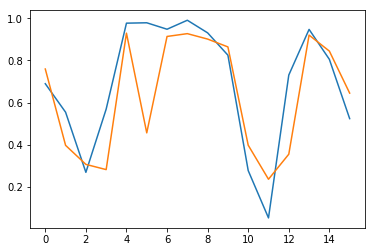


Train Epoch: 0 [544/60000 (1%)]	Loss: 0.014845
dim_factors ground truth: [0.8087838  0.78004354 0.956277   0.27720553 0.20602536 0.4687987
 0.09529662 0.03483796 0.23066038 0.72713596 0.94000345 0.04613084
 0.75714767 0.2254312  0.14111644 0.06906599]
dim_factors predicted   : [0.8404169  0.8181187  0.90697825 0.29754454 0.3068446  0.5883214
 0.2728117  0.24938396 0.30127922 0.8187601  0.89682907 0.24448252
 0.832631   0.2579787  0.2760328  0.29421675]


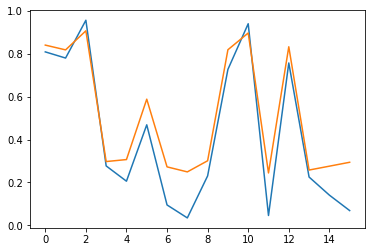


Train Epoch: 0 [560/60000 (1%)]	Loss: 0.014561
dim_factors ground truth: [0.50526494 0.91111493 0.12278074 0.5498445  0.8749216  0.07235587
 0.7245195  0.39065272 0.30517048 0.18460256 0.37233084 0.5855821
 0.7013212  0.03455067 0.1849072  0.46269023]
dim_factors predicted   : [0.48436058 0.8884593  0.20889924 0.26863885 0.8454934  0.2568479
 0.60544354 0.26860598 0.31852028 0.31651348 0.49485284 0.6070254
 0.66611063 0.24356125 0.24147207 0.44337317]


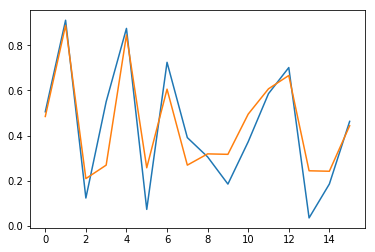


Train Epoch: 0 [576/60000 (1%)]	Loss: 0.006760
dim_factors ground truth: [0.22765732 0.3906864  0.32749403 0.9571059  0.23266506 0.856974
 0.65316474 0.09459543 0.17132872 0.662739   0.24500316 0.83705014
 0.45182377 0.4680298  0.91089123 0.6067217 ]
dim_factors predicted   : [0.33282402 0.48042288 0.36135608 0.7862038  0.2034601  0.8544918
 0.5729925  0.19535233 0.29359835 0.7417536  0.32129765 0.79775506
 0.38561085 0.5059747  0.8533819  0.54703873]


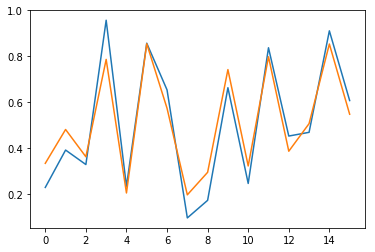


Train Epoch: 0 [592/60000 (1%)]	Loss: 0.014087
dim_factors ground truth: [0.85948867 0.40777737 0.44372946 0.7453616  0.87861496 0.01821595
 0.28938758 0.43485957 0.30104613 0.6495886  0.07129645 0.07684857
 0.41442466 0.92868817 0.20571727 0.37416524]
dim_factors predicted   : [0.85228235 0.3112866  0.30794436 0.7130353  0.65136087 0.24139023
 0.3737647  0.51286024 0.31941357 0.7088833  0.26409933 0.1949981
 0.4832911  0.84189785 0.20305677 0.25324348]


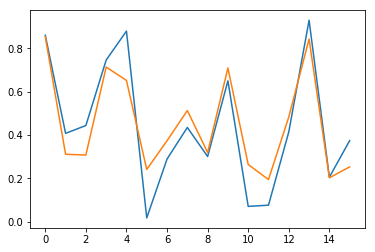


Train Epoch: 0 [608/60000 (1%)]	Loss: 0.008670
dim_factors ground truth: [0.5899814  0.6501099  0.53155065 0.11022246 0.5785313  0.84266436
 0.90933424 0.29888016 0.42020708 0.6914287  0.58448106 0.9249054
 0.8121522  0.15577948 0.41905725 0.17452455]
dim_factors predicted   : [0.38169977 0.7141484  0.49519166 0.2696199  0.5537423  0.781027
 0.840859   0.3805921  0.46430343 0.74243426 0.59690183 0.8450937
 0.82918125 0.24041499 0.2459838  0.19016193]


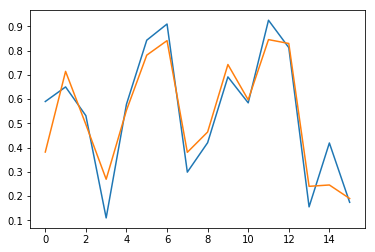


Train Epoch: 0 [624/60000 (1%)]	Loss: 0.008050
dim_factors ground truth: [0.1351192  0.936695   0.9665479  0.8679761  0.53772944 0.91503036
 0.6722769  0.25556415 0.5601214  0.20195526 0.6638321  0.05171472
 0.28562033 0.4687339  0.32086372 0.7860962 ]
dim_factors predicted   : [0.2542195  0.8979132  0.90976465 0.8673865  0.59819067 0.880303
 0.44479954 0.2546238  0.6392613  0.19820954 0.6991524  0.24492909
 0.3575073  0.45747474 0.37131312 0.8101154 ]


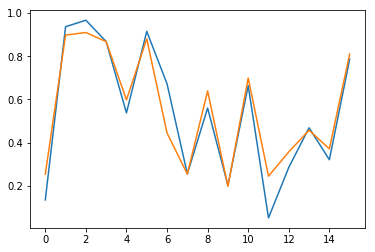


Train Epoch: 0 [640/60000 (1%)]	Loss: 0.069369
dim_factors ground truth: [0.49102515 0.19884104 0.80159533 0.7411492  0.862307   0.5646816
 0.91145694 0.8874263  0.30172622 0.04517084 0.8320931  0.59310883
 0.8257593  0.12016714 0.97984606 0.01038289]
dim_factors predicted   : [0.5190921  0.3037376  0.83146185 0.7939351  0.8694724  0.6121471
 0.8931396  0.23152408 0.29200226 0.23330618 0.9052911  0.6586627
 0.84705955 0.2009207  0.23117901 0.231669  ]


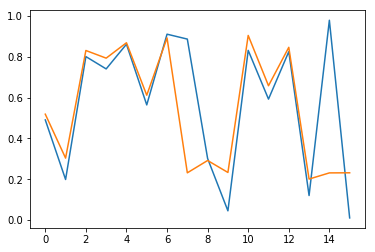


Train Epoch: 0 [656/60000 (1%)]	Loss: 0.010533
dim_factors ground truth: [0.3777582  0.32593286 0.63866824 0.94779706 0.4735002  0.7401525
 0.54185617 0.6929696  0.26841247 0.92858994 0.09137881 0.74799556
 0.88045204 0.8076953  0.6304989  0.04689926]
dim_factors predicted   : [0.3938756  0.37952635 0.76965696 0.92258596 0.5090353  0.7744901
 0.6691363  0.780208   0.26507592 0.9232169  0.2283452  0.8498282
 0.65174437 0.8879478  0.63949746 0.229535  ]


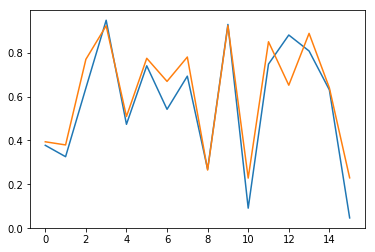


Train Epoch: 0 [672/60000 (1%)]	Loss: 0.010033
dim_factors ground truth: [0.5069872  0.20519114 0.70471483 0.5579278  0.17301917 0.7278474
 0.46477747 0.07132977 0.02861786 0.99249035 0.02597636 0.6418345
 0.80622894 0.48782688 0.92706233 0.896142  ]
dim_factors predicted   : [0.31749412 0.25430733 0.7450322  0.57657933 0.22753687 0.7487227
 0.33969584 0.20616193 0.20653506 0.9015523  0.22081535 0.6614363
 0.8392206  0.44612595 0.891461   0.871051  ]


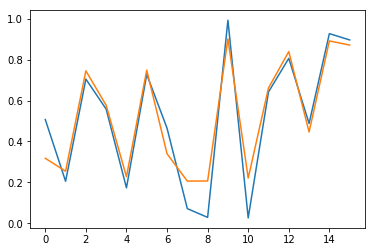


Train Epoch: 0 [688/60000 (1%)]	Loss: 0.026472
dim_factors ground truth: [0.8134167  0.22340697 0.7133187  0.02690387 0.71475226 0.96644586
 0.45791465 0.7179989  0.12192422 0.44346797 0.6806496  0.8917256
 0.15722644 0.8222711  0.34239107 0.9945445 ]
dim_factors predicted   : [0.87722576 0.23844224 0.7987954  0.21117437 0.80244267 0.88696104
 0.44154304 0.7595801  0.20477328 0.2984984  0.69978243 0.8462781
 0.18110034 0.2646683  0.20955522 0.9440761 ]


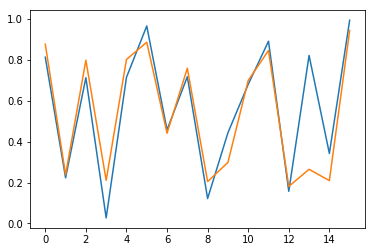


Train Epoch: 0 [704/60000 (1%)]	Loss: 0.039128
dim_factors ground truth: [0.6463217  0.06181961 0.4380176  0.35932946 0.75976604 0.9350846
 0.52398914 0.787378   0.450163   0.05400801 0.95911425 0.71320003
 0.59011626 0.24347371 0.5307131  0.14521968]
dim_factors predicted   : [0.5932134  0.1777573  0.38305226 0.32101238 0.7063207  0.8947141
 0.4570974  0.79623765 0.36475512 0.17497736 0.20668222 0.7221803
 0.58906615 0.19074647 0.45958766 0.16121915]


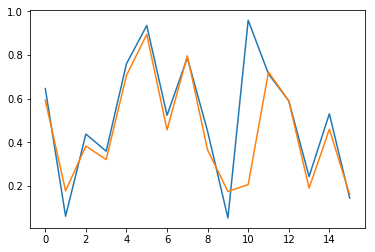


Train Epoch: 0 [720/60000 (1%)]	Loss: 0.007751
dim_factors ground truth: [0.05435389 0.31661385 0.9602165  0.7769611  0.5949682  0.08642864
 0.77251476 0.20679367 0.07297546 0.04556447 0.6819197  0.8879069
 0.39387858 0.43055552 0.7542212  0.77055573]
dim_factors predicted   : [0.19219716 0.23990422 0.865585   0.735468   0.5767253  0.22117576
 0.7360385  0.17078592 0.22059649 0.21677612 0.68470675 0.8363231
 0.3195648  0.35194945 0.7528582  0.7274426 ]


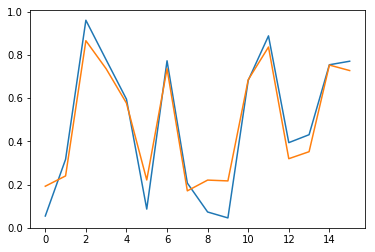


Train Epoch: 0 [736/60000 (1%)]	Loss: 0.006901
dim_factors ground truth: [0.58326477 0.5881129  0.21751249 0.99971825 0.31553298 0.5487187
 0.7788853  0.9667697  0.8255598  0.00147069 0.48369652 0.99313265
 0.41583884 0.8023413  0.01114756 0.588411  ]
dim_factors predicted   : [0.60364354 0.5717635  0.19768931 0.9072762  0.37098968 0.52956116
 0.8178239  0.93279874 0.8321982  0.22392465 0.4678412  0.938889
 0.3953363  0.78927535 0.21332155 0.61054075]


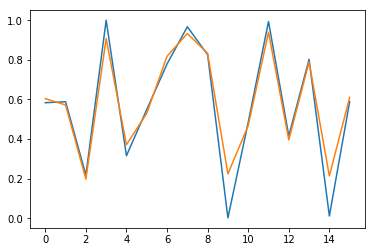


Train Epoch: 0 [752/60000 (1%)]	Loss: 0.032447
dim_factors ground truth: [0.22536355 0.61462057 0.28771597 0.57847995 0.7739146  0.36684322
 0.58989    0.84132874 0.40676105 0.814644   0.1817823  0.7028076
 0.15865159 0.901405   0.31102008 0.59464806]
dim_factors predicted   : [0.24398127 0.6450124  0.3099627  0.62538505 0.79071826 0.3408646
 0.60572946 0.8579341  0.22788255 0.8227316  0.24167837 0.73024595
 0.28388762 0.22788255 0.34453577 0.6774277 ]


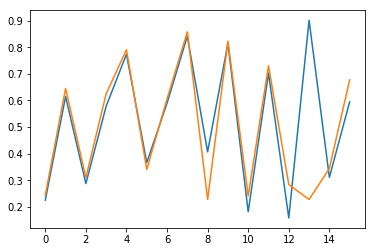


Train Epoch: 0 [768/60000 (1%)]	Loss: 0.006796
dim_factors ground truth: [0.97256076 0.05044371 0.29079407 0.7115571  0.2992828  0.76393104
 0.3887487  0.27649033 0.45980805 0.589136   0.0634594  0.61114675
 0.30295897 0.71230215 0.71764845 0.6506376 ]
dim_factors predicted   : [0.9250441  0.2392691  0.27360043 0.75567794 0.31492108 0.8777202
 0.43121198 0.25852653 0.477874   0.62270087 0.22557795 0.7165467
 0.2877232  0.7833871  0.7775668  0.72506493]


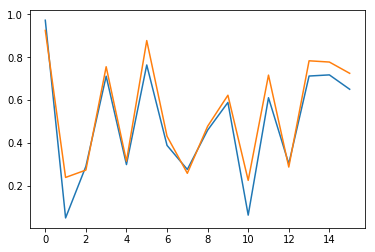


Train Epoch: 0 [784/60000 (1%)]	Loss: 0.010713
dim_factors ground truth: [0.88980085 0.8554511  0.80765164 0.75835043 0.01397985 0.55693144
 0.44806904 0.58158123 0.77040154 0.839046   0.4531806  0.71845686
 0.15708905 0.2300716  0.51312405 0.8991623 ]
dim_factors predicted   : [0.89781994 0.83570683 0.55976814 0.76234204 0.23356812 0.5363224
 0.4649795  0.6169053  0.7896989  0.8335223  0.23136725 0.77108365
 0.16944195 0.30524525 0.50655764 0.8660358 ]


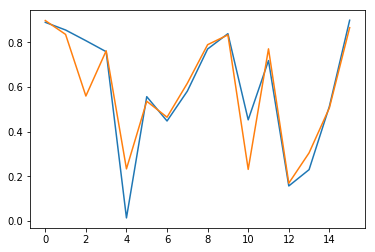


Train Epoch: 0 [800/60000 (1%)]	Loss: 0.041150
dim_factors ground truth: [0.48773175 0.32611167 0.39997238 0.2768734  0.0312975  0.9384606
 0.53385216 0.1598714  0.5412217  0.18983632 0.7282239  0.87903374
 0.8374832  0.28757524 0.45662814 0.74705696]
dim_factors predicted   : [0.27976382 0.26674122 0.34614986 0.29682493 0.20156609 0.26327026
 0.522969   0.2723733  0.2303831  0.27647218 0.71513474 0.80845827
 0.82976854 0.279662   0.48683488 0.7280698 ]


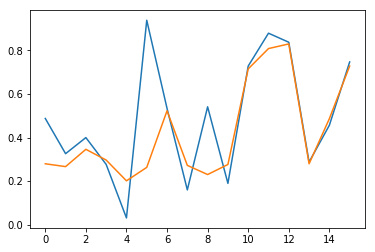


Train Epoch: 0 [816/60000 (1%)]	Loss: 0.012299
dim_factors ground truth: [0.13917464 0.5253562  0.8492879  0.04347873 0.915869   0.7722188
 0.29215628 0.16970551 0.06881601 0.65234184 0.260297   0.05256844
 0.56548584 0.49196064 0.47104007 0.8787925 ]
dim_factors predicted   : [0.21657678 0.26409587 0.8098746  0.23573524 0.8702188  0.7674311
 0.3261657  0.22048748 0.23897946 0.6467478  0.24951015 0.25561062
 0.6242578  0.45627517 0.42368445 0.8492063 ]


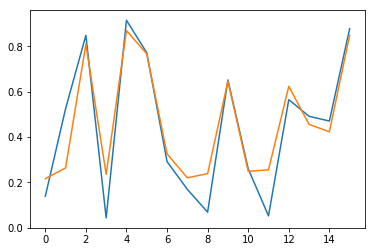


Train Epoch: 0 [832/60000 (1%)]	Loss: 0.057310
dim_factors ground truth: [0.75528616 0.19869852 0.02407044 0.6150447  0.5393766  0.4970588
 0.02042383 0.34606993 0.37055027 0.7365704  0.7689995  0.43144637
 0.13650048 0.00167453 0.2529772  0.8644832 ]
dim_factors predicted   : [0.757666   0.23299474 0.25960547 0.599024   0.51153314 0.50939476
 0.2533674  0.29451296 0.2536518  0.2847121  0.2551244  0.3869913
 0.1695326  0.2523687  0.21861066 0.36130804]


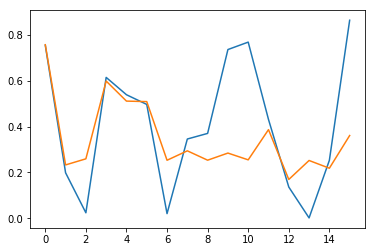


Train Epoch: 0 [848/60000 (1%)]	Loss: 0.021099
dim_factors ground truth: [0.7172172  0.40590537 0.47835273 0.55494297 0.97805065 0.59138256
 0.69853806 0.2459988  0.523017   0.5452401  0.708336   0.09175789
 0.66877985 0.66688365 0.41100633 0.6203771 ]
dim_factors predicted   : [0.8134585  0.39872676 0.4859406  0.5869333  0.91389006 0.30457434
 0.4880133  0.2938343  0.5653692  0.5727406  0.30786914 0.19827287
 0.69690144 0.76411486 0.5050882  0.64939976]


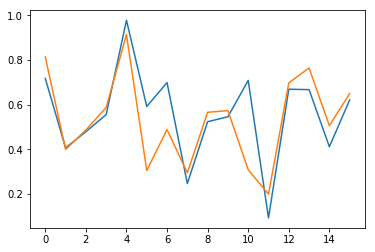


Train Epoch: 0 [864/60000 (1%)]	Loss: 0.025158
dim_factors ground truth: [0.16796684 0.4260571  0.5673673  0.01155746 0.03549206 0.9625104
 0.64674526 0.3535878  0.9395206  0.8831183  0.06367099 0.14095563
 0.21285021 0.75692093 0.20862061 0.38552463]
dim_factors predicted   : [0.39446205 0.47249871 0.6314466  0.3287926  0.3379429  0.9242274
 0.77717125 0.37059948 0.9181668  0.8815099  0.3415334  0.32101977
 0.34002945 0.81968266 0.2670371  0.4073043 ]


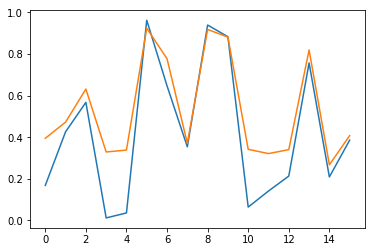


Train Epoch: 0 [880/60000 (1%)]	Loss: 0.039019
dim_factors ground truth: [0.9592129  0.75191337 0.04538971 0.0277909  0.63112676 0.86677676
 0.7436808  0.27620035 0.26694077 0.66689074 0.94175386 0.9495239
 0.7319883  0.7802494  0.2516592  0.77622306]
dim_factors predicted   : [0.7063013  0.75742847 0.28414127 0.32230535 0.6576016  0.32229173
 0.75389886 0.31980595 0.2558509  0.6785779  0.62660927 0.8201409
 0.7450233  0.78590435 0.26489398 0.8028005 ]


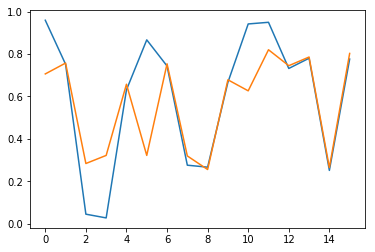


Train Epoch: 0 [896/60000 (1%)]	Loss: 0.032517
dim_factors ground truth: [5.9339505e-01 9.6849245e-01 4.5758671e-01 6.4992905e-04 8.4105897e-01
 2.9781497e-01 9.2776418e-03 7.2519642e-01 9.4430321e-01 9.3975514e-01
 9.8294127e-01 4.5423537e-01 4.5646894e-01 8.5960299e-01 1.8103725e-01
 5.6069314e-01]
dim_factors predicted   : [0.56599736 0.48269302 0.5766336  0.32744238 0.8832569  0.2568947
 0.3191639  0.73753256 0.86084807 0.914773   0.87500244 0.5148684
 0.39487323 0.81415313 0.34686297 0.6421877 ]


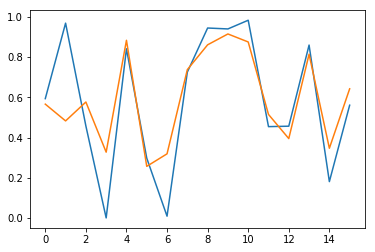


Train Epoch: 0 [912/60000 (2%)]	Loss: 0.010951
dim_factors ground truth: [0.8040717  0.48728424 0.8606782  0.6692137  0.9555085  0.31011808
 0.43031752 0.9851005  0.37748426 0.195414   0.15118682 0.7420663
 0.03163552 0.92206025 0.84446585 0.40208882]
dim_factors predicted   : [0.8083366  0.38010398 0.74303806 0.7691611  0.85673213 0.3400166
 0.44534457 0.8761109  0.3225911  0.22877374 0.27200913 0.67444575
 0.28040057 0.8377003  0.78518194 0.5480854 ]


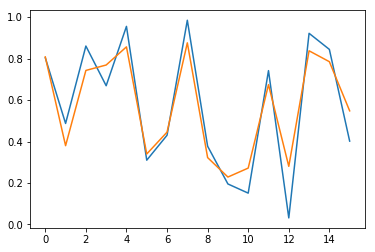


Train Epoch: 0 [928/60000 (2%)]	Loss: 0.011220
dim_factors ground truth: [0.60126716 0.31865567 0.53863645 0.7855164  0.86695445 0.8878463
 0.3429684  0.82833403 0.1997199  0.2888323  0.76465    0.4928602
 0.02357125 0.985915   0.70443034 0.59032595]
dim_factors predicted   : [0.74769604 0.40344945 0.5428127  0.7766323  0.87661254 0.8443805
 0.51798916 0.84035546 0.26338556 0.28377917 0.75700533 0.46851337
 0.3198324  0.89671594 0.70205367 0.7228994 ]


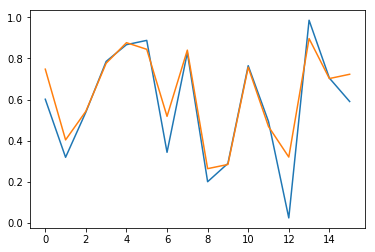


Train Epoch: 0 [944/60000 (2%)]	Loss: 0.011076
dim_factors ground truth: [0.4821878  0.14502865 0.4095844  0.55084014 0.227108   0.23221016
 0.71598655 0.8868498  0.4351437  0.49284023 0.12384671 0.2584867
 0.13568091 0.05539089 0.0908125  0.644813  ]
dim_factors predicted   : [0.481954   0.1862969  0.40762484 0.6634186  0.23527876 0.38089052
 0.7224063  0.87506175 0.423952   0.50590456 0.18502212 0.2375446
 0.36675474 0.30919605 0.22392595 0.66649103]


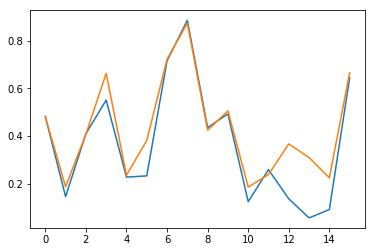


Train Epoch: 0 [960/60000 (2%)]	Loss: 0.009990
dim_factors ground truth: [0.18968725 0.9699719  0.72960734 0.03323597 0.2196846  0.5845876
 0.6212465  0.42892903 0.89500934 0.26030856 0.26090252 0.09943861
 0.9559659  0.25908858 0.3718536  0.5033718 ]
dim_factors predicted   : [0.31479368 0.9191302  0.7292823  0.28018227 0.31343824 0.5655304
 0.6296146  0.38917586 0.8820824  0.23568463 0.37592235 0.28994802
 0.8732928  0.3626495  0.3276792  0.5004874 ]


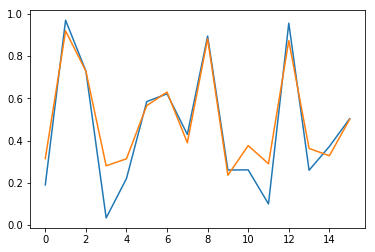


Train Epoch: 0 [976/60000 (2%)]	Loss: 0.025686
dim_factors ground truth: [0.8856296  0.31939    0.4543594  0.5206825  0.12792736 0.8867048
 0.1405142  0.8790604  0.5817552  0.278579   0.82817054 0.164366
 0.5454801  0.31898844 0.17191672 0.216182  ]
dim_factors predicted   : [0.8285214  0.3805394  0.23856035 0.49505782 0.15148471 0.8435762
 0.2622873  0.3080504  0.5657514  0.21764234 0.7736948  0.15475532
 0.5773432  0.2602738  0.15679075 0.17452183]


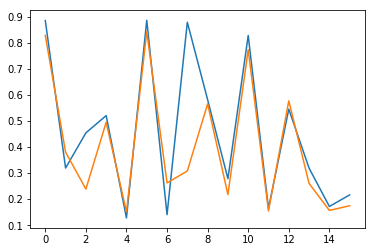


Train Epoch: 0 [992/60000 (2%)]	Loss: 0.029271
dim_factors ground truth: [0.41404372 0.23948485 0.21936637 0.93167806 0.99984765 0.87627715
 0.8890742  0.05675274 0.9378838  0.8366029  0.15922678 0.41513824
 0.68565947 0.12289625 0.42435384 0.91896695]
dim_factors predicted   : [0.39950812 0.21682799 0.1790114  0.8425593  0.9319249  0.24093863
 0.8732237  0.17683917 0.860345   0.78853077 0.1874833  0.3290873
 0.72973484 0.20948473 0.3306112  0.90042037]


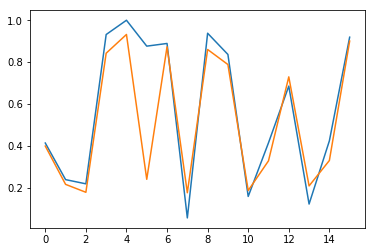


Train Epoch: 0 [1008/60000 (2%)]	Loss: 0.019928
dim_factors ground truth: [0.27237326 0.14940393 0.84940314 0.4171844  0.2545498  0.6686873
 0.83771116 0.29461843 0.9973822  0.0635137  0.10490924 0.89213395
 0.9751373  0.37581062 0.5785035  0.31676167]
dim_factors predicted   : [0.2951513  0.18890679 0.87859094 0.34636688 0.30486763 0.66311026
 0.79175353 0.20953915 0.97436607 0.19258027 0.19449428 0.92605865
 0.4789221  0.25725845 0.6893879  0.31031096]


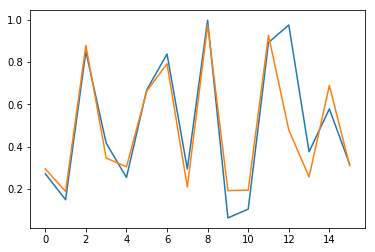


Train Epoch: 0 [1024/60000 (2%)]	Loss: 0.003342
dim_factors ground truth: [0.7166229  0.12035877 0.270127   0.5719406  0.7932816  0.6663982
 0.16057235 0.23003983 0.64300543 0.36605322 0.42421556 0.48599184
 0.27445483 0.1812712  0.45521188 0.89783895]
dim_factors predicted   : [0.8212135  0.24008252 0.28515628 0.6742809  0.80456114 0.67361146
 0.25664914 0.21146221 0.64172965 0.39159116 0.4350776  0.44991028
 0.31642696 0.18277566 0.43531215 0.957056  ]


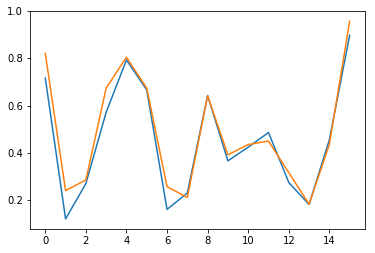


Train Epoch: 0 [1040/60000 (2%)]	Loss: 0.024665
dim_factors ground truth: [0.721864   0.05215514 0.25568348 0.9686857  0.35792887 0.45597523
 0.41170102 0.7117268  0.45212734 0.85008794 0.499254   0.4723807
 0.5539967  0.9242785  0.05972499 0.6097363 ]
dim_factors predicted   : [0.7302875  0.21687673 0.2587132  0.9552585  0.44905135 0.56586057
 0.36734003 0.21380386 0.63431436 0.8272303  0.517437   0.52457434
 0.5828698  0.74361026 0.22321416 0.6120031 ]


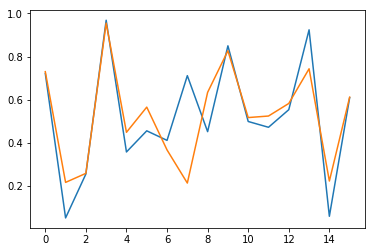


Train Epoch: 0 [1056/60000 (2%)]	Loss: 0.021276
dim_factors ground truth: [0.66585165 0.67757666 0.18951905 0.96771204 0.6654014  0.60230654
 0.20417058 0.3512702  0.7829785  0.18500656 0.5973603  0.23466522
 0.15288949 0.197267   0.08516318 0.07766145]
dim_factors predicted   : [0.7280933  0.67858523 0.17452557 0.94256234 0.6545625  0.703434
 0.17541741 0.28446317 0.40973493 0.24089573 0.2111481  0.2066046
 0.15696165 0.17763248 0.22640169 0.16316709]


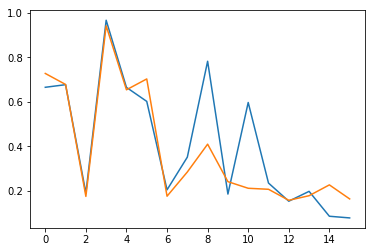


Train Epoch: 0 [1072/60000 (2%)]	Loss: 0.006614
dim_factors ground truth: [0.78110576 0.902108   0.38385975 0.38758337 0.2200405  0.6651522
 0.06954974 0.40150326 0.7753947  0.35046822 0.14803088 0.47272873
 0.15634358 0.7187841  0.8572067  0.79006284]
dim_factors predicted   : [0.8968094  0.852323   0.21250583 0.3061826  0.18856294 0.7886161
 0.16298617 0.38893348 0.76780653 0.2798539  0.21879168 0.4584863
 0.21145315 0.68772405 0.8105948  0.9015381 ]


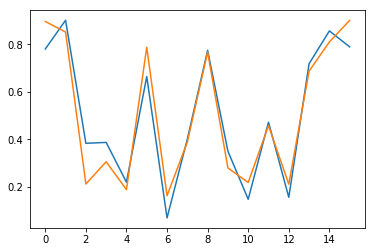


Train Epoch: 0 [1088/60000 (2%)]	Loss: 0.007840
dim_factors ground truth: [0.40697432 0.7701248  0.8571387  0.21242952 0.65347767 0.3899076
 0.6093004  0.8395217  0.99878985 0.57687616 0.22544533 0.08498353
 0.19248968 0.48963273 0.04771835 0.74164623]
dim_factors predicted   : [0.31716388 0.78113776 0.8177761  0.1752139  0.5965116  0.34539583
 0.40652525 0.78145844 0.93623894 0.5065862  0.16426894 0.23152004
 0.15888627 0.50954753 0.21557616 0.770562  ]


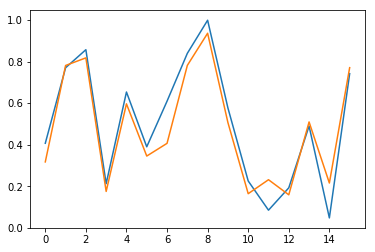


Train Epoch: 0 [1104/60000 (2%)]	Loss: 0.013335
dim_factors ground truth: [0.6368675  0.62473214 0.36026347 0.705877   0.43253887 0.7106383
 0.99986917 0.82482326 0.33684665 0.7285277  0.5492419  0.72631925
 0.25174373 0.88321525 0.4685321  0.91743904]
dim_factors predicted   : [0.5858419  0.57163894 0.3053512  0.68172926 0.34551123 0.68045384
 0.913483   0.7889559  0.3791972  0.7158235  0.49298725 0.69708544
 0.24557683 0.46157873 0.5068561  0.87438047]


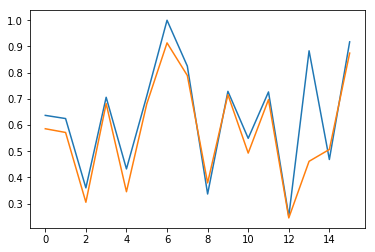


Train Epoch: 0 [1120/60000 (2%)]	Loss: 0.007892
dim_factors ground truth: [0.6720338  0.4375292  0.04863244 0.61550784 0.13473183 0.1109131
 0.03472275 0.44305062 0.8534918  0.38924706 0.46130776 0.21004134
 0.35547346 0.3535505  0.7270793  0.5809092 ]
dim_factors predicted   : [0.6921233  0.414411   0.18297431 0.66992146 0.15544087 0.28813782
 0.2598304  0.42329437 0.8486588  0.35576123 0.44511005 0.23327504
 0.31318378 0.38125828 0.7835391  0.46371406]


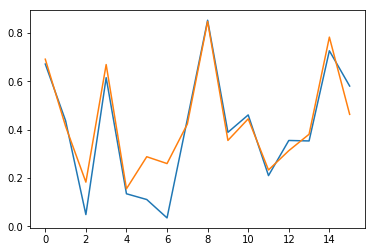


Train Epoch: 0 [1136/60000 (2%)]	Loss: 0.056533
dim_factors ground truth: [8.6219507e-01 6.8145716e-01 8.4162652e-01 8.2055551e-01 9.4844055e-01
 8.8438249e-01 5.1951408e-04 9.0338981e-01 4.9555016e-01 6.2256664e-01
 2.6380759e-01 2.2451431e-01 2.3770213e-02 8.0944300e-03 1.7032564e-02
 3.1011480e-01]
dim_factors predicted   : [0.27205357 0.7646727  0.89278567 0.8601751  0.9201503  0.42548645
 0.2707745  0.9124784  0.27165237 0.7567572  0.32661155 0.23546502
 0.27063438 0.26013786 0.26996133 0.31203783]


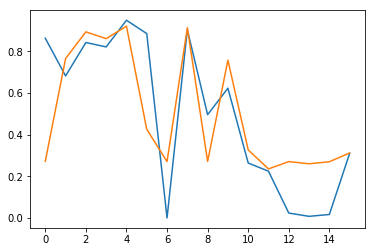


Train Epoch: 0 [1152/60000 (2%)]	Loss: 0.018314
dim_factors ground truth: [0.8451516  0.79592675 0.14754665 0.9779178  0.5611943  0.83508736
 0.5273208  0.16202772 0.4858899  0.6389199  0.28213733 0.6010013
 0.5496704  0.09031951 0.25770873 0.13647926]
dim_factors predicted   : [0.92584074 0.8767169  0.36863902 0.9570668  0.7324662  0.90598446
 0.70353186 0.1921067  0.5688227  0.74391174 0.29352605 0.29427716
 0.6637901  0.27360243 0.29727525 0.20018171]


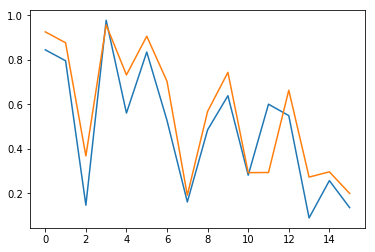


Train Epoch: 0 [1168/60000 (2%)]	Loss: 0.009812
dim_factors ground truth: [0.7925138  0.11371332 0.20423138 0.42709923 0.9465615  0.720993
 0.96877015 0.6023446  0.18891329 0.8199617  0.28425413 0.4716071
 0.05816948 0.53420925 0.6216996  0.2104724 ]
dim_factors predicted   : [0.8603333  0.2923288  0.28860217 0.4725539  0.93616194 0.71581465
 0.95160246 0.68612397 0.19830725 0.8855715  0.28196216 0.40945405
 0.2839148  0.6763391  0.70851374 0.34042707]


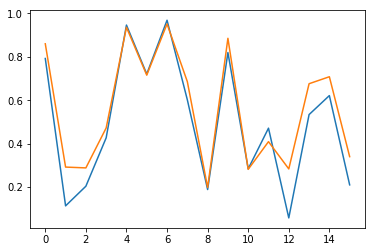


Train Epoch: 0 [1184/60000 (2%)]	Loss: 0.051871
dim_factors ground truth: [0.6422089  0.69765186 0.04826558 0.14455843 0.5631271  0.03197247
 0.0116387  0.09412682 0.2911051  0.06896794 0.10698497 0.03101534
 0.03480422 0.65647835 0.9673574  0.6228081 ]
dim_factors predicted   : [0.6452431  0.74296844 0.2629207  0.22103852 0.6134502  0.277347
 0.2651488  0.24628787 0.27287477 0.23802799 0.16333325 0.27171853
 0.26951188 0.64919525 0.27546206 0.5792962 ]


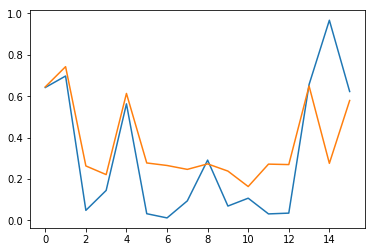


Train Epoch: 0 [1200/60000 (2%)]	Loss: 0.015834
dim_factors ground truth: [0.14552253 0.03339958 0.43050086 0.06119835 0.6656073  0.2758518
 0.2511304  0.7371642  0.2110247  0.73157823 0.33220816 0.57953423
 0.84093577 0.66114056 0.02353638 0.3625394 ]
dim_factors predicted   : [0.15705664 0.24971993 0.49229532 0.21792881 0.55435634 0.1625114
 0.14775842 0.5195714  0.16873923 0.7368591  0.35971588 0.4381069
 0.75253075 0.5351695  0.20480852 0.23736696]


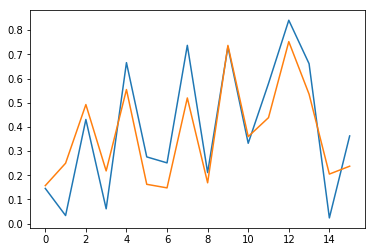


Train Epoch: 0 [1216/60000 (2%)]	Loss: 0.018787
dim_factors ground truth: [0.53997827 0.60903734 0.21871805 0.06117558 0.17232913 0.71044165
 0.5083232  0.58476734 0.5729109  0.99523956 0.12429011 0.7048839
 0.5359534  0.9548816  0.9348129  0.7647688 ]
dim_factors predicted   : [0.42033628 0.62216985 0.16154508 0.20891556 0.22302939 0.61318153
 0.2337897  0.4879936  0.46843493 0.8411744  0.1468523  0.71651196
 0.4554263  0.8123021  0.6315773  0.66381365]


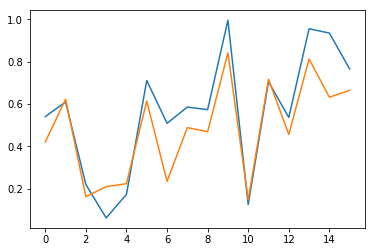


Train Epoch: 0 [1232/60000 (2%)]	Loss: 0.045066
dim_factors ground truth: [0.6237975  0.47004813 0.81952345 0.66204363 0.10706562 0.45001572
 0.13593996 0.7129062  0.4420396  0.6611003  0.19865763 0.76645213
 0.8583114  0.02374387 0.73173356 0.98261136]
dim_factors predicted   : [0.3613271  0.55152035 0.82486784 0.6679124  0.14494671 0.5291411
 0.2860998  0.7346911  0.43797076 0.5808645  0.16153961 0.78647363
 0.872878   0.22915591 0.75041556 0.23177207]


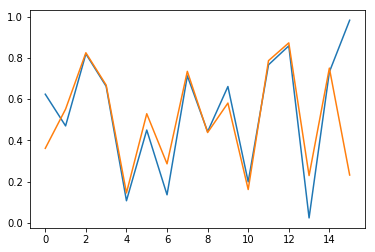


Train Epoch: 0 [1248/60000 (2%)]	Loss: 0.012131
dim_factors ground truth: [0.51865166 0.72584796 0.67796046 0.43049085 0.47329992 0.14092904
 0.30297846 0.5875016  0.41614765 0.7624483  0.80877197 0.6091706
 0.70860904 0.4400459  0.65876716 0.35895616]
dim_factors predicted   : [0.24398476 0.78083324 0.81549895 0.4769181  0.5103492  0.24702397
 0.32171184 0.66037506 0.24423617 0.88331074 0.8474115  0.66705984
 0.76758903 0.4742693  0.78586453 0.27858436]


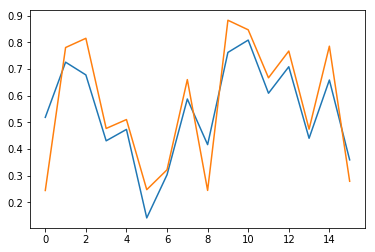


Train Epoch: 0 [1264/60000 (2%)]	Loss: 0.036436
dim_factors ground truth: [0.38770485 0.18874937 0.84680253 0.4083333  0.36705548 0.65072834
 0.44125283 0.8113389  0.5738517  0.8423528  0.65244436 0.4783228
 0.487077   0.89059806 0.7871064  0.8997214 ]
dim_factors predicted   : [0.25076166 0.20404619 0.93693817 0.4637421  0.38775057 0.73908895
 0.5201279  0.8740943  0.29796922 0.87207216 0.73043704 0.41342103
 0.60389775 0.8158062  0.86167526 0.24986376]


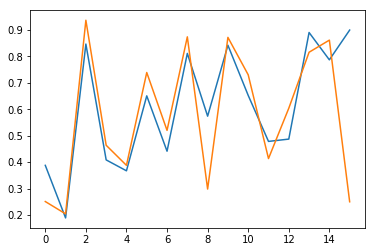


Train Epoch: 0 [1280/60000 (2%)]	Loss: 0.010791
dim_factors ground truth: [0.54186183 0.11320794 0.9891149  0.04136854 0.7611498  0.30229747
 0.13063067 0.3786103  0.48204648 0.94126844 0.646246   0.9771362
 0.95007265 0.9675301  0.21515733 0.6885384 ]
dim_factors predicted   : [0.37707925 0.26892278 0.87235516 0.25596488 0.8234737  0.31566
 0.26310265 0.46295726 0.5762116  0.9603273  0.73363215 0.9498996
 0.91359067 0.9541305  0.28066677 0.78568447]


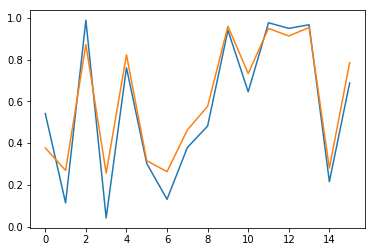


Train Epoch: 0 [1296/60000 (2%)]	Loss: 0.040318
dim_factors ground truth: [0.20319444 0.45711124 0.853612   0.08867854 0.49026334 0.45481664
 0.20675093 0.58605677 0.22593427 0.28458428 0.5534367  0.46309584
 0.18186992 0.03316438 0.11759019 0.93913484]
dim_factors predicted   : [0.3710769  0.4893966  0.8521562  0.17264469 0.5353637  0.4825831
 0.21411125 0.6637018  0.2544872  0.3746624  0.62695014 0.26462778
 0.3586328  0.2223729  0.2728958  0.2645712 ]


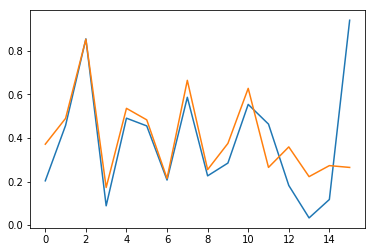


Train Epoch: 0 [1312/60000 (2%)]	Loss: 0.011789
dim_factors ground truth: [0.11049664 0.367073   0.9993456  0.09370375 0.3697415  0.7827015
 0.03300828 0.82309103 0.6194045  0.55441153 0.00365424 0.4508267
 0.347453   0.72426003 0.6091916  0.5982798 ]
dim_factors predicted   : [0.2917095  0.4716537  0.92234755 0.2603731  0.3240519  0.7812632
 0.232885   0.82784903 0.6210843  0.54272085 0.26020843 0.4212722
 0.3229458  0.7371818  0.61610717 0.5603944 ]


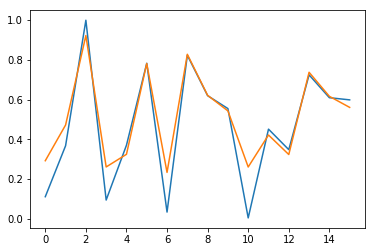


Train Epoch: 0 [1328/60000 (2%)]	Loss: 0.012552
dim_factors ground truth: [0.22136438 0.03274131 0.8987956  0.6359874  0.12949145 0.9440419
 0.3528645  0.09531569 0.25287515 0.38455898 0.9077762  0.5453547
 0.73703814 0.98798674 0.41299397 0.76910913]
dim_factors predicted   : [0.33811545 0.24130291 0.7517179  0.56953657 0.2868757  0.83221966
 0.29109716 0.16987604 0.1820825  0.30748826 0.8247269  0.41799524
 0.6778338  0.876983   0.27709007 0.71774125]


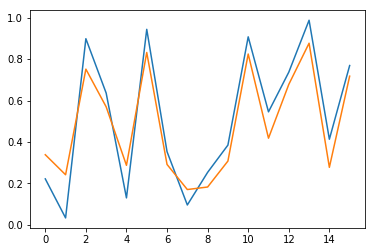


Train Epoch: 0 [1344/60000 (2%)]	Loss: 0.009718
dim_factors ground truth: [0.05644321 0.07107347 0.22329676 0.32646787 0.42235702 0.67029184
 0.89741534 0.71385604 0.48080552 0.34237766 0.35839635 0.58556145
 0.4101169  0.6003545  0.90805197 0.7722464 ]
dim_factors predicted   : [0.22240277 0.2596324  0.18327868 0.25774565 0.46533367 0.6432551
 0.8225284  0.70055    0.24341565 0.32507902 0.2895916  0.532645
 0.32759675 0.60524464 0.82631373 0.7692927 ]


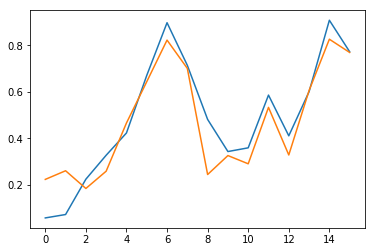


Train Epoch: 0 [1360/60000 (2%)]	Loss: 0.055952
dim_factors ground truth: [0.20508432 0.91396135 0.6099633  0.9651276  0.68513876 0.46231532
 0.6285755  0.39154518 0.61718196 0.8471404  0.85558355 0.28308272
 0.09748083 0.941607   0.2479741  0.9572493 ]
dim_factors predicted   : [0.19812995 0.9199103  0.58855176 0.9329899  0.73446345 0.47886077
 0.6657394  0.45435712 0.5971294  0.24429877 0.89541465 0.2846623
 0.26465997 0.24429877 0.32376596 0.9402675 ]


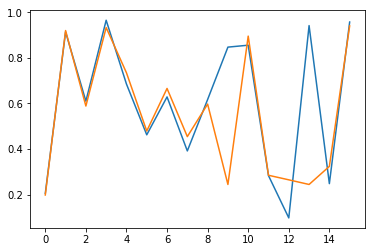


Train Epoch: 0 [1376/60000 (2%)]	Loss: 0.021112
dim_factors ground truth: [0.77622    0.8316499  0.7977655  0.00635898 0.63993996 0.90904343
 0.4167331  0.19085807 0.9894057  0.26545614 0.5936092  0.03656209
 0.69033456 0.3292027  0.7605067  0.8729638 ]
dim_factors predicted   : [0.8975431  0.8722151  0.797458   0.24410489 0.7708518  0.9255778
 0.41192448 0.30103314 0.8813433  0.26231888 0.60685974 0.25092027
 0.27627772 0.3692838  0.82325137 0.84991246]


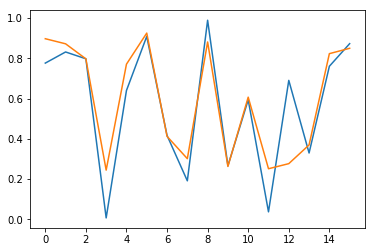


Train Epoch: 0 [1392/60000 (2%)]	Loss: 0.005819
dim_factors ground truth: [0.37908947 0.83957493 0.1060344  0.63992083 0.2595697  0.6728557
 0.7016677  0.74410355 0.5322365  0.9727497  0.19612253 0.8616076
 0.32265103 0.33146083 0.2267062  0.86747956]
dim_factors predicted   : [0.44463423 0.9464087  0.20374098 0.65595806 0.295413   0.85266596
 0.7228632  0.7609131  0.6419388  0.9719858  0.2274474  0.95317954
 0.3614731  0.38537192 0.24240877 0.952253  ]


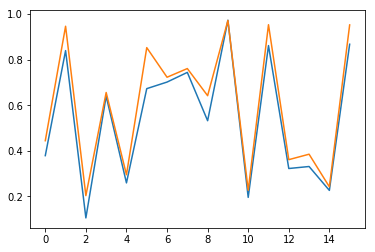


Train Epoch: 0 [1408/60000 (2%)]	Loss: 0.015823
dim_factors ground truth: [0.01361918 0.7871561  0.8635701  0.4726603  0.36135083 0.4005916
 0.71257204 0.80751145 0.8978966  0.7459079  0.6596859  0.079988
 0.38983375 0.9329223  0.77738726 0.8478795 ]
dim_factors predicted   : [0.24084565 0.6593384  0.8222718  0.46900728 0.3408248  0.48106542
 0.44003662 0.79796135 0.8480973  0.8827693  0.82100993 0.2756588
 0.395676   0.9069757  0.8686009  0.935396  ]


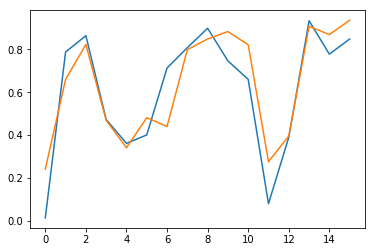


Train Epoch: 0 [1424/60000 (2%)]	Loss: 0.008075
dim_factors ground truth: [0.7592607  0.59348315 0.0436421  0.29703343 0.8336712  0.46710515
 0.77649015 0.11454397 0.8231423  0.0170213  0.578845   0.2629465
 0.29569477 0.48045337 0.05204505 0.22195572]
dim_factors predicted   : [0.72302186 0.55718607 0.25796762 0.2745704  0.7850594  0.4443547
 0.84697473 0.1780167  0.8152279  0.22950098 0.5745093  0.2505993
 0.27457964 0.47520664 0.20144537 0.21303676]


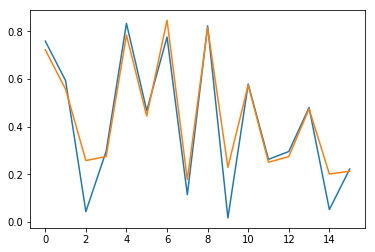


Train Epoch: 0 [1440/60000 (2%)]	Loss: 0.005107
dim_factors ground truth: [0.7212715  0.83084506 0.7481959  0.6257325  0.16791075 0.31681925
 0.07641733 0.58792835 0.38810307 0.85616964 0.9636831  0.05215651
 0.260639   0.7736702  0.9505662  0.6436173 ]
dim_factors predicted   : [0.6899471  0.8220842  0.74365324 0.5853838  0.25601447 0.29484776
 0.21548684 0.5404421  0.31224117 0.8309331  0.90146756 0.1898703
 0.24493173 0.74155444 0.8278591  0.5836102 ]


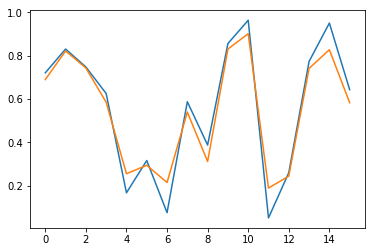


Train Epoch: 0 [1456/60000 (2%)]	Loss: 0.012326
dim_factors ground truth: [0.32816726 0.6265321  0.17835301 0.47014207 0.27168536 0.6191238
 0.02222997 0.0498057  0.3899718  0.02148747 0.3696108  0.03710985
 0.45476288 0.07995391 0.37997317 0.11573052]
dim_factors predicted   : [0.24023135 0.5435203  0.21970871 0.40453267 0.21032485 0.5566701
 0.20701887 0.18118887 0.31811473 0.21430334 0.2921578  0.2366603
 0.36602294 0.2180475  0.36224854 0.16133061]


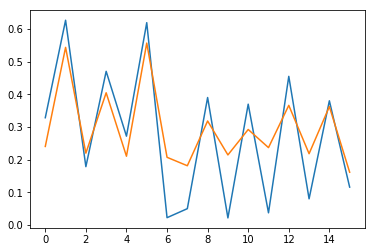


Train Epoch: 0 [1472/60000 (2%)]	Loss: 0.050698
dim_factors ground truth: [0.35077822 0.65831083 0.13892478 0.37502426 0.3337198  0.31656855
 0.25470597 0.6261859  0.7892496  0.7872696  0.309851   0.8027162
 0.08772284 0.84109634 0.12415963 0.88331836]
dim_factors predicted   : [0.27759537 0.6112769  0.24791422 0.3512529  0.25537086 0.24509235
 0.20238854 0.57433325 0.752528   0.7128182  0.24119711 0.24904172
 0.18965955 0.7898287  0.26110506 0.23173779]


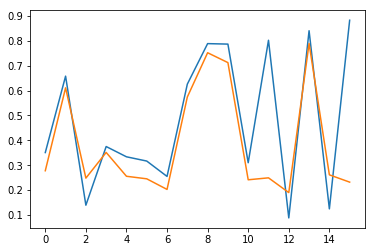


Train Epoch: 0 [1488/60000 (2%)]	Loss: 0.026763
dim_factors ground truth: [0.1759687  0.7964426  0.7109666  0.4464119  0.8175209  0.50598395
 0.98651856 0.5457709  0.04857588 0.01178896 0.6554815  0.9866849
 0.7707516  0.22448564 0.15708888 0.88599163]
dim_factors predicted   : [0.20121434 0.7387329  0.72087985 0.41662282 0.24445109 0.4768502
 0.9270013  0.53026885 0.18501768 0.22927374 0.6360857  0.8895419
 0.8019105  0.32615423 0.21233916 0.8750083 ]


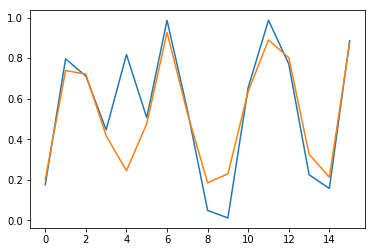


Train Epoch: 0 [1504/60000 (3%)]	Loss: 0.013976
dim_factors ground truth: [0.63018316 0.01910639 0.5176465  0.004282   0.15546823 0.29704994
 0.224675   0.53512096 0.16287172 0.4424708  0.6419823  0.15292192
 0.66224724 0.74220186 0.76430136 0.16869956]
dim_factors predicted   : [0.6812713  0.25937817 0.6029728  0.25306267 0.23678586 0.28780192
 0.22930653 0.56976074 0.26819444 0.2596182  0.75299567 0.18898481
 0.7747727  0.7561409  0.8461951  0.26075384]


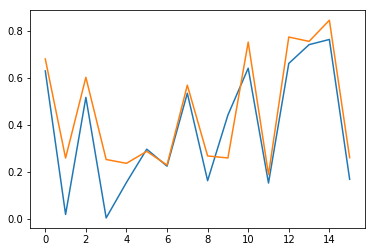


Train Epoch: 0 [1520/60000 (3%)]	Loss: 0.023257
dim_factors ground truth: [0.8197229  0.9448567  0.23508465 0.38135815 0.47328907 0.4667521
 0.06030738 0.8268923  0.79448944 0.9526121  0.1548667  0.25186145
 0.3742162  0.49157357 0.55598205 0.52084386]
dim_factors predicted   : [0.26300567 0.93842006 0.2477361  0.38930437 0.4893649  0.5178751
 0.24211062 0.88767916 0.80281365 0.89390117 0.18609835 0.25477353
 0.39295432 0.5708494  0.6275609  0.5985385 ]


KeyboardInterrupt: 

In [4]:
model = NetCNN(input_shape=[1, 28, 28])
device = torch.device('cuda')
# optimizer = torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0.9, nesterov=True)
optimizer = torch.optim.Adam(model.parameters())

model.train()
model.to(device)

for epoch in range(10):
    for batch_idx, (data, target) in enumerate(train_loader):
        dim_factors = torch.rand(batch_size).view(batch_size,-1).to(device)
#         print(torch.mean(data), torch.std(data))
#         data = torch.randn_like(data)
        data = torch.cat([torch.from_numpy(make_sun()) for i in range(batch_size)]).view(batch_size, 1, 28, 28).float()
        data = data.to(device)
        dimmed_data = data.clone().to(device)
        for i in range(batch_size):
            dimmed_data[i] *= dim_factors[i]
        data, target, dimmed_data = data.to(device), target.to(device), dimmed_data.to(device)
        optimizer.zero_grad()
        output = model(dimmed_data)
        loss = nn.MSELoss()(output, dim_factors)
        loss.backward()
        optimizer.step()
        if batch_idx % 1 == 0:
            print('\nTrain Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            dim_factors_numpy = dim_factors.view(-1).cpu().numpy()
            print('dim_factors ground truth: {}'.format(dim_factors_numpy))
            plt.plot(dim_factors_numpy)
            output_numpy = output.detach().view(-1).cpu().numpy()
            print('dim_factors predicted   : {}'.format(output_numpy))
            plt.plot(output_numpy)
            plt.show()


(28, 28)


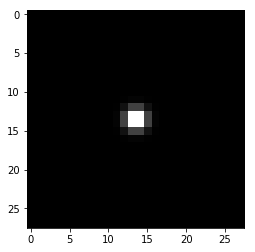

In [23]:
image = make_sun()
print(image.shape)
plt.imshow(image,cmap='gray')

In [27]:
data = torch.cat([torch.from_numpy(make_sun()) for i in range(batch_size)]).view(batch_size, -1)
data.shape

torch.Size([16, 784])